In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd

import os
import matplotlib.pyplot as plt
import matplotlib.image as imd

# Cargamos los datos NO ESTRUCTURADOS (importamos las imagenes con sus etiquetas respectivas)
* Son imagenes de Señales de transito en este caso.

In [2]:
### Enlistamos cada uno de los directorios (carpetas) ###
def cargar_ml_data(data_directory):
    dirs = [d for d in os.listdir(data_directory)
            if os.path.isdir(os.path.join(data_directory,d))]

### Array de etiquetas para las imagenes Y sus respectivas imagenes. Luego Creamos el bucle para recorrer carpetas y subcarpetas
    print(dirs)
    labels=[]
    images=[]
    for d in dirs: 
        label_dir = os.path.join(data_directory,d)
        file_names = [os.path.join(label_dir,f)
                      for f in os.listdir(label_dir)
                      if f.endswith(".ppm")]
        for f in file_names: # Este bucle es para que recorra las imagenes y pueda cargar todas y cada una de las imagenes
            images.append(imd.imread(f))
            labels.append(int(d))
    return images , labels

**Creamos una funcion donde pueda cargar los datos. Es una funcion con bucles para que explore y cargue una por una las carpetas.**

----
-----

# Hacemos un análisis exploratorio sobre la imagenes que tenemos.

In [3]:
### CARGAMOS LAS IMAGENES DE TESTEO Y ENTRENAMIENTO ### 
main_dir = "./belgian/"
train_data = os.path.join(main_dir,"Training")
test_data = os.path.join(main_dir,"Testing")

In [4]:
images , labels = cargar_ml_data(train_data)

['00000', '00001', '00002', '00003', '00004', '00005', '00006', '00007', '00008', '00009', '00010', '00011', '00012', '00013', '00014', '00015', '00016', '00017', '00018', '00019', '00020', '00021', '00022', '00023', '00024', '00025', '00026', '00027', '00028', '00029', '00030', '00031', '00032', '00033', '00034', '00035', '00036', '00037', '00038', '00039', '00040', '00041', '00042', '00043', '00044', '00045', '00046', '00047', '00048', '00049', '00050', '00051', '00052', '00053', '00054', '00055', '00056', '00057', '00058', '00059', '00060', '00061']


In [5]:
len(images)

4575

* Tenemos 4575 tipos de "fotos" de 62 tipos distintos
-----

In [6]:
### LO PASAMOS A FORMATO ARRAY ###
images = np.array(images)
labels = np.array(labels)

C:\Users\Acer\AppData\Local\Temp\ipykernel_21248\1517360288.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  images = np.array(images)


In [7]:
### Contiente 1 columna con 4575 filas ###

images.ndim , images.size

(1, 4575)

In [8]:
images[0]

array([[[210, 249, 232],
        [204, 249, 208],
        [197, 198, 155],
        ...,
        [ 51,  60,  40],
        [ 54,  64,  44],
        [ 57,  66,  46]],

       [[209, 250, 236],
        [212, 255, 217],
        [200, 196, 156],
        ...,
        [ 49,  57,  38],
        [ 51,  59,  41],
        [ 53,  60,  42]],

       [[203, 246, 236],
        [207, 246, 213],
        [202, 192, 156],
        ...,
        [ 47,  53,  35],
        [ 48,  54,  36],
        [ 48,  55,  37]],

       ...,

       [[  2,  22,  25],
        [ 26,  56,  77],
        [ 71, 140, 159],
        ...,
        [ 84,  77,  50],
        [ 68,  66,  41],
        [ 56,  64,  44]],

       [[  0,  22,  32],
        [ 30,  75, 106],
        [ 87, 176, 198],
        ...,
        [ 86,  80,  52],
        [ 68,  66,  41],
        [ 55,  63,  42]],

       [[  0,  32,  50],
        [ 42, 101, 135],
        [121, 217, 239],
        ...,
        [ 87,  80,  52],
        [ 70,  68,  43],
        [ 58,  66,  46]]

**Observación**
* Vemos que las imagenes van a ser representadas como un array bidimensional de valores distribuidos en filas y columnas.
* El valor 0 en las columnas es el negro y el valor 255 es el blanco ( son sus respectivos valores para las imagenes y sus pixeles). 
* Es decir que son los valores extremos , Lo valores que esten estre esos numeros van a variar.
----

In [9]:
len(set(labels))

62

**Observación**
* Podemos observar que tenemos 62 etiquietas para cada grupo de imagenes, es decir que tenemos 62 tipos de "carteles"
----

In [10]:
images.nbytes/images.itemsize

4575.0

* Cuantos Bytes estoy usando con las imagenes cargadas a mi ordenador

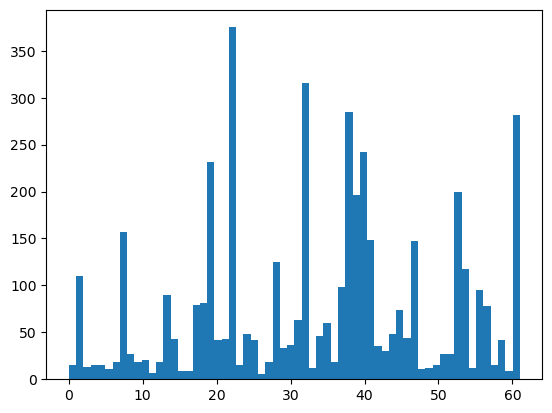

In [11]:
plt.hist(labels,len(set(labels)))
plt.show()

**Observaciónes**
* Podemos ver que cargamos algunas señales de traficos con pocas fotos y que otras predominan.

----
# Empezamos a construir el modelo 
* Primero hacemos una visualizacion de algunas imagenes seleccionadas 

In [12]:
import random

figuras_random = random.sample(range(0,len(labels)),7)
figuras_random

[51, 2167, 3875, 1716, 1808, 246, 3593]

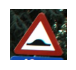

Forma:(123, 136, 3), min:0, max:255


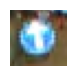

Forma:(26, 26, 3), min:17, max:255


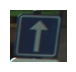

Forma:(88, 95, 3), min:0, max:255


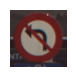

Forma:(111, 109, 3), min:15, max:255


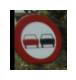

Forma:(148, 139, 3), min:0, max:186


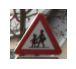

Forma:(130, 148, 3), min:19, max:255


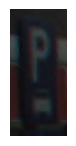

Forma:(72, 32, 3), min:6, max:80


In [13]:
### Creamos un bucle para que nos imprima las 7 imagenes seleccionas aleatoriamente.
for i in range(len(figuras_random)):
    im_temporal = images[figuras_random[i]]
    plt.subplot(1,7,i+1)
    plt.axis("off")
    plt.imshow(images[figuras_random[i]])
    plt.subplots_adjust(wspace=0.3)
    plt.show()
    print("Forma:{0}, min:{1}, max:{2}".format(im_temporal.shape,im_temporal.min(),im_temporal.max()))

**Observaciónes**
* Se pueden observar que son imagenes de distinta calidad y tamaño.
    * Forma (altura, ancho, canales de colores usados).
    * Min (minimo color de pixel usado).
    * Max (Maximo color de pixel usado).

----
---
# Hacemos una representacion grafica de todas las imagenes que tengamos
* creamos un bucle para ver una de cada grupo de imagenes, y asi corroborar que tipo de carteles tenemos

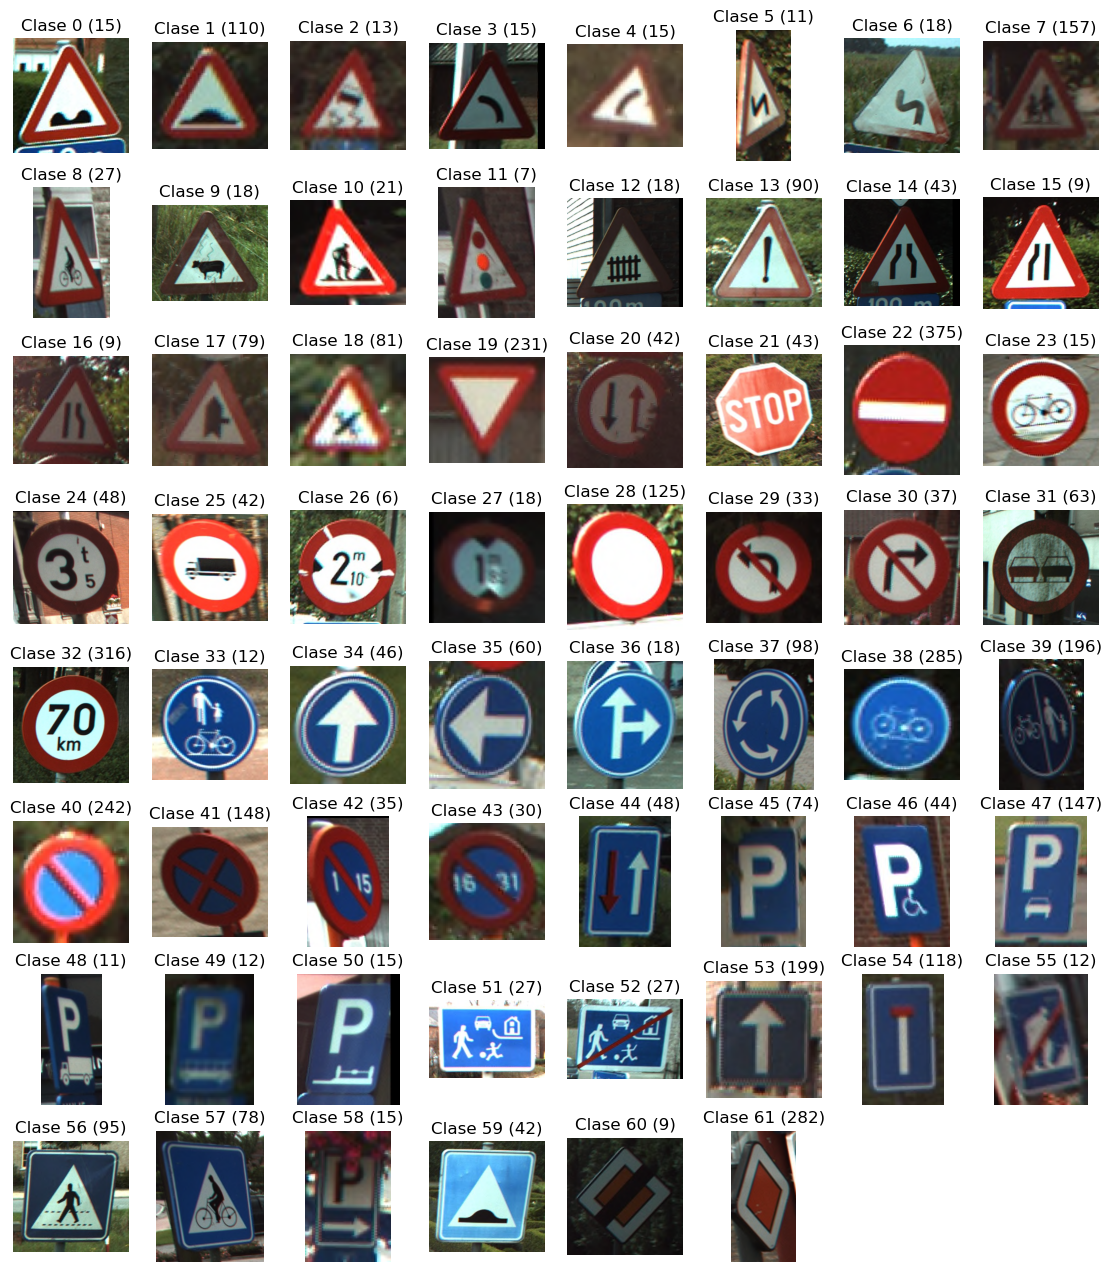

In [14]:
### Creamos para que sean las etiquetas UNICAS ###
labels_unicos = set(labels)
plt.figure(figsize=(14,16))
i = 1

for label in labels_unicos:
    im_temporal = images[list(labels).index(label)]
    plt.subplot(8,8,i)
    plt.axis("off")
    plt.title("Clase {0} ({1})".format(label, list(labels).count(label)))
    i +=1
    plt.imshow(im_temporal)
plt.show()

# Resumen del análisis preliminar.

**Observaciónes** 
*  Hay 62 clases de imágenes (desde la 0 hasta la 61).
* Tenemos varios tipos de señales de tránsito (informativas y Restrictivas). No tenemos señales Preventivas.
* Son señalamientos tantos de forma Verticales y Horizontales.
* No son todas del mismo tamaño y la distribución de las señales de trafico no es uniforme (algunas salen mas veces que otras)
----
----


# MODELO DE RED NEURONAL (usando TensorFlow)
* Vamos a pasar las imágenes en escalas de grises y tratar de que sean todas del mismo tamaño.

In [15]:
from skimage import transform

In [16]:
### Indicamos altura y anchura

width = 9999
height = 9999

### Creamos un bucle para recorrer las imágenes una por una

for image in images:
    if image.shape[0] < height:
        height = image.shape[0]
        
    if image.shape[1] < width:
        width = image.shape[1]
        
print("Tamaño minimo : {0}x{1}".format(height,width))

Tamaño minimo : 22x20


**Observación**
* como podemos observar aca nos dice que el tamaño minimo es de 22 de alto y 20 de ancho.
* Hay que tener en cuenta que al redimenciónar las imágenes van a ser muy pequeñas y no seran faciles de identificar.
* Para eso intentare de pasarlo por lo menos a una escala un poco más grande y que sean todas del mismo tamaño. 
----

In [85]:
### Pasamos las imagenes una por una a una tamaño 30x30.
images30 = [transform.resize(image,(30,30)) for image in images]

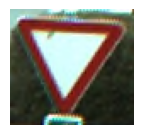

Forma:(30, 30, 3), min0.053146774452715234 , max0.9999849375048953


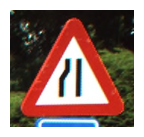

Forma:(30, 30, 3), min0.042420556809197145 , max0.9998105850849242


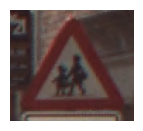

Forma:(30, 30, 3), min0.11163932554920071 , max0.6283973964066627


In [86]:
figuras_random = random.sample(range(0,len(labels)),3)
figuras_random

for i in range(len(figuras_random)):
    temp_im = images30[figuras_random[i]]
    plt.subplot(1,3,i+1)
    plt.axis("off")
    plt.imshow(images[figuras_random[i]])
    plt.subplots_adjust(wspace=0.5)
    plt.show()
    print("Forma:{0}, min{1} , max{2}".format(temp_im.shape,temp_im.min(),temp_im.max()))

**Observación**
* Como podemos ver quedaron reescaladas en un tamaño 30x30
* Lo que hicimos también es normalizar los numeros de los colores ( de 0.0 a 1.0)
* Ahora lo pasaremos a escalas de grises.
----

In [87]:
from skimage.color import rgb2gray

In [88]:
images30 = np.array(images30)
images30 = rgb2gray(images30[...,0:3])

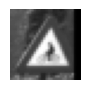

Forma:(30, 30), min0.0, max0.5519588594766548


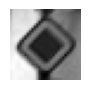

Forma:(30, 30), min0.07726871927613604, max0.7509853024153539


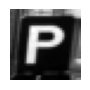

Forma:(30, 30), min0.0840488306744697, max0.4291595065576255


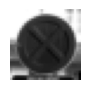

Forma:(30, 30), min0.16332615757506208, max0.9999999993068146


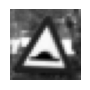

Forma:(30, 30), min0.05917719657258827, max0.9942452832509624


In [89]:
figuras_random = random.sample(range(0,len(labels)),5)

for i in range(len(figuras_random)):
    temp_im = images30[figuras_random[i]]
    plt.subplot(1,5,i+1)
    plt.axis("off")
    plt.imshow(temp_im ,cmap="gray")
    plt.subplots_adjust(wspace=0.5)
    plt.show()
    
    print("Forma:{0}, min{1}, max{2}".format(temp_im.shape, temp_im.min(), temp_im.max()))

In [90]:
### Creamos un place holders de 32byts ###
### Le indicamos a TF que nos reserve espacios para guardar objetos de tamaño 30x30

tf.compat.v1.disable_eager_execution()
x = tf.compat.v1.placeholder(dtype=tf.float32, shape=[None,30,30])

y = tf.compat.v1.placeholder(dtype= tf.int32, shape=[None])

### Usaremos en la red neuronal la funcion FLATTEN para aplanar los datos a una sola dimensión 
images_flat = tf.compat.v1.layers.flatten(x)


### La capa de conexion sera de tipo densa ###
logits = tf.compat.v1.layers.dense(images_flat,62,tf.nn.relu)

#Calculamos la funcion media de la perdida de los elementos
loss = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y,logits=logits))

### Usaremos la funcion de optimizar ADAM para poder minimizar la funcion de perdida
train_op = tf.compat.v1.train.AdamOptimizer(learning_rate=0.001).minimize(loss)

prediccion_final= tf.argmax(logits,1)
accuaracy = tf.reduce_mean(tf.cast(prediccion_final,tf.float32))

C:\Users\Acer\AppData\Local\Temp\ipykernel_21248\2037736668.py:10: UserWarning: `tf.layers.flatten` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Flatten` instead.
  images_flat = tf.compat.v1.layers.flatten(x)
C:\Users\Acer\AppData\Local\Temp\ipykernel_21248\2037736668.py:14: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  logits = tf.compat.v1.layers.dense(images_flat,62,tf.nn.relu)


In [91]:
print(images_flat) , print(logits) , print(loss)

Tensor("flatten_7/Reshape:0", shape=(None, 900), dtype=float32)
Tensor("dense_7/Relu:0", shape=(None, 62), dtype=float32)
Tensor("Mean_14:0", shape=(), dtype=float32)


(None, None, None)

**Observación sobre el Tensor**

* Vemos que tenemos un tensor aplanado de 900 pixeles (30x30).
* Es un tipo relu con 62 posibles tipos de salidas (es decir funcion tipo relog, y contiene las 62 imagenes como opcion de salida).
* Tiene un promedio de 0 por que obviamente no creamos la prediccion, luego de hacerla veremos que media tiene de perdida.

----

In [92]:
### Creamos una semilla para que no nos arroje siempre distintos resultados
tf.random.set_seed(42)

sess = tf.compat.v1.Session()
sess.run(tf.compat.v1.global_variables_initializer())

for i in range(501):
    _, accuaracy_val = sess.run([train_op,accuaracy],
                                feed_dict={
                                    x:images30, 
                                    y:list(labels)
                                })
    
    _,loss_val = sess.run([train_op,loss], feed_dict={x:images30, y:list(labels)})
    
    if i%50 == 0:
        print("EPOCH",i)
        print("Eficacia Del modelo", accuaracy_val)
        print("Perdida que fuimos generando", loss_val)
        print()


EPOCH 0
Eficacia Del modelo 35.000217
Perdida que fuimos generando 4.1417356

EPOCH 50
Eficacia Del modelo 36.21377
Perdida que fuimos generando 2.6957285

EPOCH 100
Eficacia Del modelo 35.822952
Perdida que fuimos generando 2.42326

EPOCH 150
Eficacia Del modelo 35.60962
Perdida que fuimos generando 2.2839203

EPOCH 200
Eficacia Del modelo 35.233223
Perdida que fuimos generando 2.193645

EPOCH 250
Eficacia Del modelo 34.977486
Perdida que fuimos generando 2.1295013

EPOCH 300
Eficacia Del modelo 34.77661
Perdida que fuimos generando 2.0807517

EPOCH 350
Eficacia Del modelo 34.47388
Perdida que fuimos generando 2.0421295

EPOCH 400
Eficacia Del modelo 34.220764
Perdida que fuimos generando 2.010491

EPOCH 450
Eficacia Del modelo 33.954315
Perdida que fuimos generando 1.9839178

EPOCH 500
Eficacia Del modelo 33.830162
Perdida que fuimos generando 1.9610776



**Observación**
* Se puede observar que desde la 1ra **EPOCA**(EPOCH) el modelo arroja una eficacia de 26.14, Luego en la ultima de 500 arroja una eficacia de 32.31.
* Como podemos ver desde la EPOCA 50 en adelante tiene una efcacia entre 34 y 32.31 (No ganamos ni perdemos nada casi, eso quiere decir que se estabilizo la eficacia)
* Sucede lo mismo con la perdida. Entre la EPOCA 50 y 100 La perdida que se fue generando queda al mismo nivel( varia entre 1,6 y 1,1).
------

# Evaluacion de la red Neuronal.

In [93]:
### Creamos unos indices de las muestras. Tanto en imagenes como de las etiquetas

sample_indx = random.sample(range(len(images30)),50)
sample_images = [images30[i]for i in sample_indx]
sample_labels = [labels[i]for i in sample_indx]

In [94]:
### PREDICCIÓN ####
prediccion = sess.run([prediccion_final], feed_dict={x:sample_images})[0]
prediccion

array([41, 22,  1, 61, 32, 57, 53,  0, 38, 61, 38, 53, 47, 53, 38, 41, 31,
       32, 38, 17, 47,  0, 32, 38, 40, 32,  1, 22, 38, 14, 45, 32, 47, 38,
        1, 53, 53, 22, 41, 61,  7, 53, 22,  1, 40, 38, 22,  0, 22, 40],
      dtype=int64)

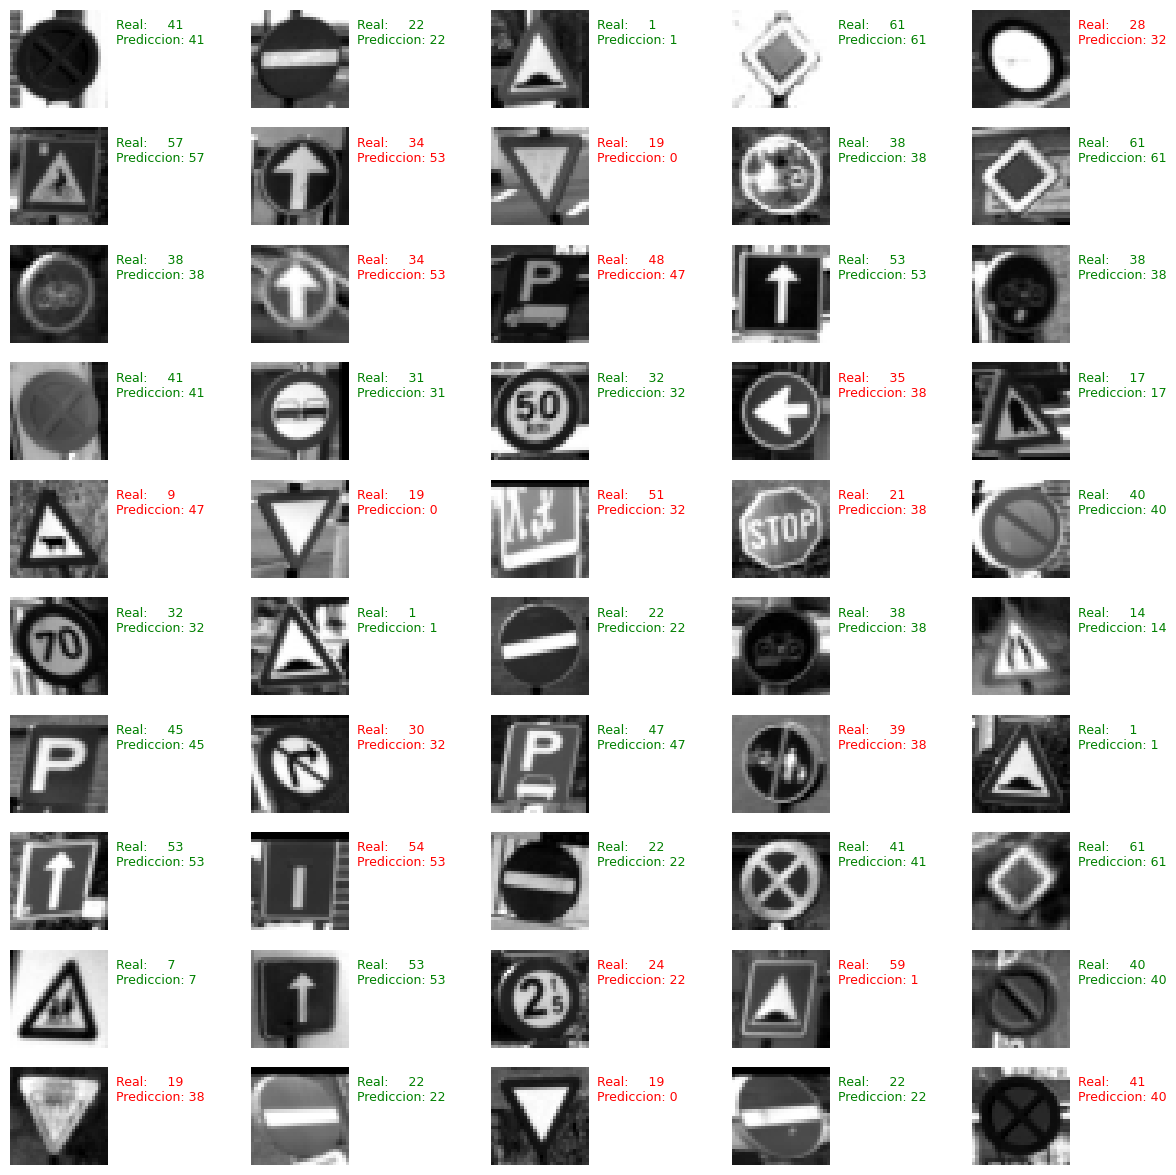

In [95]:
### PREDICCIÓN EN FORMA GRAFICA ###
plt.figure(figsize=(15,15))
for i in range(len(sample_images)):
    
    truth = sample_labels[i]
    predic = prediccion[i]
    
    plt.subplot(10,5,i+1)
    plt.axis('off')
    color = "green" if truth==predic else "red"
    
    plt.text(32,10,"Real:     {0}\nPrediccion: {1}". format(truth,predic),
            fontsize=9, color=color)
    plt.imshow(sample_images[i], cmap="gray")

**Observación**
* Se puede apreciar que la red neuronal todavia puede aprender muchísimo mas, tiene mucho margen de mejora, todavia se le puede dar mas iteraciones.
* Lo que hicimos aca es solamente ver la eficacia en 50 imagenes aleatorias.
* Para ver verdaderamente como funciona el modelo si es regular, buena o mala. Cargaremos todo el dataset de entrenamiento y ver que tal funciona.
-----

In [96]:
test_images , test_labels = cargar_ml_data(test_data)

['00000', '00001', '00002', '00003', '00004', '00005', '00006', '00007', '00008', '00009', '00010', '00011', '00012', '00013', '00014', '00015', '00016', '00017', '00018', '00019', '00020', '00021', '00022', '00023', '00024', '00025', '00026', '00027', '00028', '00029', '00030', '00031', '00032', '00033', '00034', '00035', '00036', '00037', '00038', '00039', '00040', '00041', '00042', '00043', '00044', '00045', '00046', '00047', '00048', '00049', '00050', '00051', '00052', '00053', '00054', '00055', '00056', '00057', '00058', '00059', '00060', '00061']


In [97]:
test_images30 = [transform.resize(im,(30,30)) for im in test_images]

In [98]:
### Pasamos a escalas de grises (de 3 canales y no de 4)
test_images30 = np.array(test_images30)
test_images30 = rgb2gray(test_images30[...,0:3])

In [99]:
prediccion = sess.run([prediccion_final] , feed_dict={x:test_images30})[0]
prediccion

array([ 1,  1,  1, ..., 61, 61, 61], dtype=int64)

In [100]:
match_count = sum([int(lor==lpr)for lor,lpr in zip(test_labels,prediccion)])
print("Clasifico correctamente:",match_count)

Clasifico correctamente: 1456


In [101]:
eficacia = match_count/len(test_labels)*100
print("La eficacia de la red neuronal es del: %{:.2f}".format(eficacia))

La eficacia de la red neuronal es del: %57.78


------------
-----------
# RESUMEN.
## Observación
* ### Tenemos una red neuronal con una eficacia del: % 57.78 (la primera vez que lo hice me dio 63.99) 
* ### Podemos ver que la red neuronal tien un poco de problemas con el overfitings. Se podra mejorar por ejemplo en buscar dintintas funciones , usar otros kernels, otros tipos de convoluciones o también poder hacerla con la libreria de KERAS y no TENSORFLOW.

* ### Tengo pensado en cambiar el valor de learning_rate o Cambiar el optimizador para ver si tiene una leve mejoria.

In [123]:
test_images35 = [transform.resize(im,(30,30)) for im in test_images]

images35 = np.array(images30)
images35 = rgb2gray(images30[...,0:3])

In [124]:
tf.compat.v1.disable_eager_execution()
x = tf.compat.v1.placeholder(dtype=tf.float32, shape=[None,30,30])
y = tf.compat.v1.placeholder(dtype= tf.int32, shape=[None])

images_flat = tf.compat.v1.layers.flatten(x)

logits = tf.compat.v1.layers.dense(images_flat,62,tf.nn.relu)

loss = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y,logits=logits))

##### ACA CAMBIAMOS EL OPTIMIZADOR ADAM POR EL RMSProp ####
train_op = tf.compat.v1.train.RMSPropOptimizer(learning_rate=0.001).minimize(loss)

prediccion_final= tf.argmax(logits,1)
accuaracy = tf.reduce_mean(tf.cast(prediccion_final,tf.float32))

C:\Users\Acer\AppData\Local\Temp\ipykernel_21248\364632498.py:5: UserWarning: `tf.layers.flatten` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Flatten` instead.
  images_flat = tf.compat.v1.layers.flatten(x)
C:\Users\Acer\AppData\Local\Temp\ipykernel_21248\364632498.py:7: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  logits = tf.compat.v1.layers.dense(images_flat,62,tf.nn.relu)


In [125]:
### Creamos una semilla para que no nos arroje siempre distintos resultados
tf.random.set_seed(42)

sess = tf.compat.v1.Session()
sess.run(tf.compat.v1.global_variables_initializer())

for i in range(501):
    _, accuaracy_val = sess.run([train_op,accuaracy],
                                feed_dict={
                                    x:images30, 
                                    y:list(labels)
                                })
    
    _,loss_val = sess.run([train_op,loss], feed_dict={x:images30, y:list(labels)})
    
    if i%100 == 0:
        print("EPOCH",i)
        print("Eficacia Del modelo", accuaracy_val)
        print("Perdida que fuimos generando", loss_val)
        print()

EPOCH 0
Eficacia Del modelo 22.484371
Perdida que fuimos generando 4.1960998

EPOCH 100
Eficacia Del modelo 33.310165
Perdida que fuimos generando 2.0965052

EPOCH 200
Eficacia Del modelo 33.949944
Perdida que fuimos generando 1.5780691

EPOCH 300
Eficacia Del modelo 33.998688
Perdida que fuimos generando 1.3952591

EPOCH 400
Eficacia Del modelo 33.960655
Perdida que fuimos generando 1.2990149

EPOCH 500
Eficacia Del modelo 33.891365
Perdida que fuimos generando 1.2397203



In [131]:
sample_indx = random.sample(range(len(images30)),50)
sample_images = [images30[i]for i in sample_indx]
sample_labels = [labels[i]for i in sample_indx]

######## ######### ########

test_images , test_labels = cargar_ml_data(test_data)
test_images30 = [transform.resize(im,(30,30)) for im in test_images]

['00000', '00001', '00002', '00003', '00004', '00005', '00006', '00007', '00008', '00009', '00010', '00011', '00012', '00013', '00014', '00015', '00016', '00017', '00018', '00019', '00020', '00021', '00022', '00023', '00024', '00025', '00026', '00027', '00028', '00029', '00030', '00031', '00032', '00033', '00034', '00035', '00036', '00037', '00038', '00039', '00040', '00041', '00042', '00043', '00044', '00045', '00046', '00047', '00048', '00049', '00050', '00051', '00052', '00053', '00054', '00055', '00056', '00057', '00058', '00059', '00060', '00061']


In [132]:
test_images30 = np.array(test_images30)
test_images30 = rgb2gray(test_images30[...,0:3])

prediccion = sess.run([prediccion_final] , feed_dict={x:test_images30})[0]

In [133]:
match_count = sum([int(lor==lpr)for lor,lpr in zip(test_labels,prediccion)])
print("Clasifico correctamente:",match_count)

Clasifico correctamente: 1954


In [134]:
eficacia = match_count/len(test_labels)*100
print("La eficacia de la red neuronal es del: %{:.2f}".format(eficacia))

La eficacia de la red neuronal es del: %77.54


# AHORA TENGO UNA EFICACIA DEL 77.54% subio un poco  
-----
# Por lo que investigue el que mejor se ajusta al modelo creado es RMSprop: Es similar al algoritmo de gradiente descendiente, pero ajusta el tamaño del paso de acuerdo a la media móvil de los gradientes pasados.


--------
---------
---------
-------------
....

In [171]:
test_images35 = [transform.resize(im,(30,30)) for im in test_images]

images35 = np.array(images30)
images35 = rgb2gray(images30[...,0:3])

#########

tf.compat.v1.disable_eager_execution()
x = tf.compat.v1.placeholder(dtype=tf.float32, shape=[None,30,30])
y = tf.compat.v1.placeholder(dtype= tf.int32, shape=[None])

images_flat = tf.compat.v1.layers.flatten(x)

logits = tf.compat.v1.layers.dense(images_flat,62,tf.nn.relu)

loss = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y,logits=logits))

##### ACA CAMBIAMOS EL OPTIMIZADOR ADAM POR EL RMSProp Y aplicamos el Learning Rate Decay para mejorar la tasa de aprendizaje.

global_step = tf.Variable(0, trainable=False)
starter_learning_rate = 0.001
learning_rate = tf.compat.v1.train.exponential_decay(starter_learning_rate, global_step,
                                           decay_steps=1000, decay_rate=0.96, staircase=True)
train_op = tf.compat.v1.train.RMSPropOptimizer(learning_rate).minimize(loss, global_step=global_step)

#train_op = tf.compat.v1.train.RMSPropOptimizer(learning_rate=0.0001).minimize(loss)

prediccion_final= tf.argmax(logits,1)
accuaracy = tf.reduce_mean(tf.cast(prediccion_final,tf.float32))

C:\Users\Acer\AppData\Local\Temp\ipykernel_21248\1324902883.py:12: UserWarning: `tf.layers.flatten` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Flatten` instead.
  images_flat = tf.compat.v1.layers.flatten(x)
C:\Users\Acer\AppData\Local\Temp\ipykernel_21248\1324902883.py:14: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  logits = tf.compat.v1.layers.dense(images_flat,62,tf.nn.relu)


In [172]:
### Creamos una semilla para que no nos arroje siempre distintos resultados
tf.random.set_seed(42)

sess = tf.compat.v1.Session()
sess.run(tf.compat.v1.global_variables_initializer())

for i in range(701):
    _, accuaracy_val = sess.run([train_op,accuaracy],
                                feed_dict={
                                    x:images30, 
                                    y:list(labels)
                                })
    
    _,loss_val = sess.run([train_op,loss], feed_dict={x:images30, y:list(labels)})
    
    if i%100 == 0:
        print("EPOCH",i)
        print("Eficacia Del modelo", accuaracy_val)
        print("Perdida que fuimos generando", loss_val)
        print()

EPOCH 0
Eficacia Del modelo 30.489836
Perdida que fuimos generando 4.1931114

EPOCH 100
Eficacia Del modelo 34.57661
Perdida que fuimos generando 2.1597378

EPOCH 200
Eficacia Del modelo 34.268635
Perdida que fuimos generando 1.6268436

EPOCH 300
Eficacia Del modelo 33.782513
Perdida que fuimos generando 1.440515

EPOCH 400
Eficacia Del modelo 33.396286
Perdida que fuimos generando 1.3430933

EPOCH 500
Eficacia Del modelo 33.06098
Perdida que fuimos generando 1.2818285

EPOCH 600
Eficacia Del modelo 32.701202
Perdida que fuimos generando 1.2404871

EPOCH 700
Eficacia Del modelo 32.52612
Perdida que fuimos generando 1.2100198



In [173]:
sample_indx = random.sample(range(len(images30)),50)
sample_images = [images30[i]for i in sample_indx]
sample_labels = [labels[i]for i in sample_indx]

######## ######### ########

test_images , test_labels = cargar_ml_data(test_data)
test_images30 = [transform.resize(im,(30,30)) for im in test_images]

###### ########## ###########

test_images30 = np.array(test_images30)
test_images30 = rgb2gray(test_images30[...,0:3])

prediccion = sess.run([prediccion_final] , feed_dict={x:test_images30})[0]

['00000', '00001', '00002', '00003', '00004', '00005', '00006', '00007', '00008', '00009', '00010', '00011', '00012', '00013', '00014', '00015', '00016', '00017', '00018', '00019', '00020', '00021', '00022', '00023', '00024', '00025', '00026', '00027', '00028', '00029', '00030', '00031', '00032', '00033', '00034', '00035', '00036', '00037', '00038', '00039', '00040', '00041', '00042', '00043', '00044', '00045', '00046', '00047', '00048', '00049', '00050', '00051', '00052', '00053', '00054', '00055', '00056', '00057', '00058', '00059', '00060', '00061']


In [174]:
match_count = sum([int(lor==lpr)for lor,lpr in zip(test_labels,prediccion)])
print("Clasifico correctamente:",match_count)
print()
eficacia = match_count/len(test_labels)*100
print("La eficacia de la red neuronal es del: %{:.2f}".format(eficacia))

Clasifico correctamente: 1630

La eficacia de la red neuronal es del: %64.68
